# Neural & Behavioral Modeling - Week 10 (Exercises)
Howard Chao (ntueeb05howard@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 A Two-layered Linear Network as a Regression Model (7 points)
Data fitting of the following network is poor. Please check if adding bias terms or chaging network hyperparameters (e.g., learning rate, amount of training, etc.) help. If not, please explain why the fitting is poor given that the network/regression model has sufficient degrees of freedom (i.e., network weights or regression coefficients) to overfit such a small data set.

In [19]:
set_printoptions(precision=3,suppress=True)
X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix

In [20]:
X

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 1]])

In [21]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1]])

In [22]:
W

array([[ 0.677,  0.203,  0.944,  0.559],
       [ 0.626,  0.285,  0.128,  0.604]])

Origin W: 
 [[ 0.527  0.003  0.438  0.744]
 [ 0.914  0.063  0.83   0.629]]
Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.679  0.   ]
 [ 0.643 -0.   ]
 [ 1.321  0.   ]
 [-0.     0.643]
 [ 0.     0.643]
 [ 0.     1.286]]


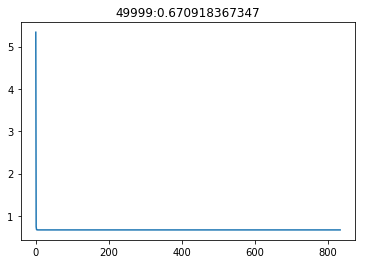

In [24]:
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix

eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

print("Origin W: \n", W)

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples (0 ~ 5)
#     p=random.randint(nP); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
#     print("y: ", y)
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
#     print(outer(Y[p].T-y,X[p]))
    W=W+deltaW;  # apply the weight update
#     print(c)
#     print(W)
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors (0, 60 ,120 ...)
        predY=W.dot(X.T) # testing ALL the training samples (X transform 4*6)
#         print("W : \n", W)
#         print("X : \n", X.T)
#         print("predY:")
#         print("Normal: ")
#         print((Y.T-predY))
#         print("Square: ")
#         print((Y.T-predY)**2)
#         print(predY.T) # predicted Y
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
#         print("totErr: ", totErr)
    if(totErr<tol):
        break # break if max error is below tolerance
# print("len", len(totErr_hist))
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

### 說明

1. 測試結果大概到 360 多次就已經到達訓練的極限，無法再增加準確度，故增加訓練次數對於準確度的提升沒有影響。
2. 嘗試調整 eta=0.1 (learning rate)，雖然有改變訓練的結果，但是預測的結果卻變得不準確。（因為eta變大，**delta learning** 變快，大 'deltaW=eta*outer(Y[p].T-y,X[p])'， backpropagation 的修正項變大）
3. 本次因為資料的問題，所以無法透過 regression model 來接近所要的結果（接近Y），解釋原因如下：

In [36]:
X

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 1]])

In [37]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1]])

In [38]:
# 結果Ｗ
W

array([ 0.819,  0.655,  0.108])

'X' 是一個 6*4 的矩陣，而所要預測的 'Y' 是一個 6*2 的矩陣。
可以利用線性代數的方法解釋，可以試 X 為 六個聯立方程式。我們看前三個連立方程式：

'x = 1'

'y = 1'

'x + y = 1'

'a = 1'

'b = 1'

'a + b = 1'

不管由上面三式，或者下面三式，都無法找到解，所以這題無法使用一般的方法訓練出接近 'Y'(預期結果的答案)。
加入修正項，來嘗試逼近結果

In [65]:
### Write your codes with bias terms here

###  Write your discussions here, if any

## 2 PyTorch (3 points)
Read <a href="http://noahsnail.com/2017/09/18/2017-9-18-PyTorch%E5%9F%BA%E6%9C%AC%E7%94%A8%E6%B3%95(%E4%B8%80)%E2%80%94%E2%80%94Numpy%EF%BC%8CTorch%E5%AF%B9%E6%AF%94/">this tutorial</a> first and port the following Instar Learning from NumPy to PyTorch:

In [32]:
# Instar learning:
x=array([0.1,0.3,0.5])
W=random.rand(3)
for i in range(10): # trials 
    y=dot(W,x)
    print(W,y)
    W+=y*(x-W) # Postsynaptically gated InStar 

[ 0.424  0.961  0.769] 0.71495969147
[ 0.192  0.488  0.577] 0.454028223058
[ 0.15   0.403  0.542] 0.406796473795
[ 0.13   0.361  0.525] 0.383691868531
[ 0.118  0.338  0.515] 0.37076457254
[ 0.112  0.324  0.51 ] 0.363065804678
[ 0.107  0.315  0.506] 0.358322057789
[ 0.105  0.31   0.504] 0.355340080917
[ 0.103  0.306  0.503] 0.353442536132
[ 0.102  0.304  0.502] 0.352225797431


In [33]:
### Write your PyTorch codes here
import torch as t
import numpy as np

In [34]:
x=array([0.1,0.3,0.5])
torch_data = t.FloatTensor(x)
W=random.rand(3)
torch_random = t.FloatTensor(W)
dot_result = 0
for i in range(1,10):
    for i in range(0,3):
        dot_result += torch_random[i]*torch_data[i]
#     dot_result = torch_random.dot(torch_data)
    print(torch_random, dot_result)
    torch_random += dot_result * (torch_data - torch_random)

tensor([ 0.8192,  0.6548,  0.1083]) tensor(0.3325)
tensor([ 0.5801,  0.5368,  0.2386]) tensor(0.6709)
tensor([ 0.2580,  0.3779,  0.4140]) tensor(1.0170)
tensor([ 0.0973,  0.2987,  0.5015]) tensor(1.3671)
tensor([ 0.1010,  0.3005,  0.4995]) tensor(1.7171)
tensor([ 0.0993,  0.2997,  0.5004]) tensor(2.0671)
tensor([ 0.1008,  0.3004,  0.4996]) tensor(2.4171)
tensor([ 0.0989,  0.2995,  0.5006]) tensor(2.7671)
tensor([ 0.1019,  0.3009,  0.4990]) tensor(3.1171)


In [35]:
torch_random

tensor([ 0.0960,  0.2980,  0.5022])

## Self notebook

### Normal conversion between array and tensor

In [44]:
np.arange(6).reshape((2,3))

array([[0, 1, 2],
       [3, 4, 5]])

In [45]:
# numpy的array与torch的tensor的转换
np_data = np.arange(6).reshape((2, 3))

In [73]:
torch_data = t.from_numpy(np_data)

In [72]:
tensor2array = torch_data.numpy() 

In [48]:
print('numpy data: ', np_data)
print('torch data: ', torch_data)
print('tensor2array: ', tensor2array)

numpy data:  [[0 1 2]
 [3 4 5]]
torch data:  tensor([[ 0,  1,  2],
        [ 3,  4,  5]])
tensor2array:  [[0 1 2]
 [3 4 5]]


### Conversion to float tensor

In [49]:
data = [-2, -1, 0, 1, 2]
float_data = t.FloatTensor(data)
print(float_data)

tensor([-2., -1.,  0.,  1.,  2.])


In [50]:
print(np.abs(data))


[2 1 0 1 2]


### Conversion to abs tensor

In [51]:
print(t.abs(float_data))

tensor([ 2.,  1.,  0.,  1.,  2.])


### Conversion to sin

In [54]:
print(np.sin(data))
print(t.sin(float_data))

[-0.90929743 -0.84147098  0.          0.84147098  0.90929743]
tensor([-0.9093, -0.8415,  0.0000,  0.8415,  0.9093])


### Conversion to mean

In [56]:
print(np.mean(data))
print(t.mean(float_data))

0.0
tensor(0.)


### Matrix

In [60]:
data = [[1, 2], [3, 4]]
tensor = t.FloatTensor(data)
print(np.matmul(data, data))

[[ 7 10]
 [15 22]]


In [61]:
# torch.mm不支持广播形式
print(t.mm(tensor, tensor))
# torch.matmul支持广播形式
print(t.matmul(tensor, tensor))

tensor([[  7.,  10.],
        [ 15.,  22.]])
tensor([[  7.,  10.],
        [ 15.,  22.]])
